## **Project Member** 
HUANG Minghao-66599

HAN Ye-66600

# Train a scoring model

In this project, you will put yourself in the shoes of a data scientist working in a banking organisation. You work for the credit risk unit, and they ask you to use their data to provide them with a reliable model for detecting credit defaults.

# import of packages

Complete with the packages you need.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Data

## Loading in the Colab environment

You will use data from a Kaggle competition. 

You will find the dataset and more information informations about it, with this [link](https://www.kaggle.com/c/home-credit-default-risk/overview).

So that you don't bother to download the data, I did it for you. 

I share the data with you from my google drive. 

Before starting please import the TP files via the link below:

https://drive.google.com/drive/folders/1zYotRg3l_m66JQRrGYi1VkuW0A0tfC4K?usp=sharing

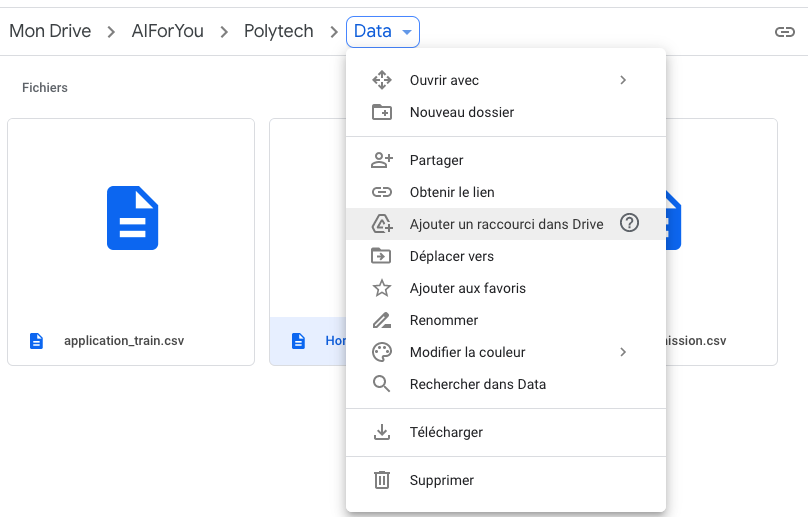

Add a shortcut to your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

## Data import 

Import of the data to be used during model training.

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Data/application_train.csv')

In [ ]:
Quick overview of the data.

In [ ]:
data.head()

# Data exploration

Explore your data to see what it's made of. Think about visualising and quantifying the interactions between your explanatory data and your target variable.

In [ ]:
df_dum = pd.get_dummies(data)
labels = data['TARGET']

df_dum.head()

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(50)

Before looking into the correlations of the dataset, we first transfered the data into numericals by using the function get dummy. Then we see how much portion of the missing values takes place in the variables. By doing so, we will not consider those variables with large missing values.

In [ ]:
correlations = df_dum.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Since the highest correlations displayed above do not have a high portion of missing value, therefore, we will only take the first 5 in both positive correlations and the negative correlations.

# Data selection

Select from among the available variables those that seem most promising for the training of your model.

In [ ]:
df = data[['TARGET','DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','NAME_EDUCATION_TYPE','REGION_RATING_CLIENT','NAME_INCOME_TYPE','CODE_GENDER','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY']]
df

# Data Cleaning

Implement data cleaning to remove missing values.

In [ ]:
df_d = pd.get_dummies(df)

df_d

In [ ]:
df_d=df_d.dropna()

# Data spliting

Sequencing of data sets for model training.

If you need help, feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
dim = np.shape(df_d)
N = dim[0]

y = np.zeros([N,1])
y[:,0] = df_d['TARGET']


X = np.ones([N,25])
x = df_d.iloc[:, 1:24]
x= x.to_numpy()

dimension  = np.size(X,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Establish a baseline model

Create a very simple template (without machine learning) that will serve as a reference for the rest of the project.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x, y)
dummy_clf.predict(x)

In [ ]:
dummy_clf.score(x, y)

In [ ]:
y_train_prediction_base = dummy_clf.predict(X_train_norm)

y_test_prediction_base = dummy_clf.predict(X_test_norm)

In [ ]:
y_train_prediction_proba_base = dummy_clf.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba_base = dummy_clf.predict_proba(X_test_norm)[:, 1]

In [ ]:
auc_train_base = roc_auc_score(y_train, y_train_prediction_proba_base)

auc_test_base = roc_auc_score(y_test, y_test_prediction_proba_base)

print('AUC for the training set : '+str(auc_train_base))

print('AUC for the testing set : '+str(auc_test_base))

In [ ]:
fpr_train_base, tpr_train_base, _ = roc_curve(y_train, y_train_prediction_proba_base)

fpr_test_base, tpr_test_base, _ = roc_curve(y_test, y_test_prediction_proba_base)

In [ ]:
plt.plot(fpr_train_base, tpr_train_base, color='blue', label='AUC_train = %0.2f' % auc_train_base)
plt.plot(fpr_test_base, tpr_test_base, color='orange', label='AUC_test = %0.2f' % auc_test_base)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- Baseline Model')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

# Use Logistic regression algorithm to train a model 

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Data preprocessing

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### Train your model on the training dataset

In [ ]:
log_reg.fit(X_train_norm, y_train)

### Evaluate your model on the testing dataset

In [ ]:
y_train_prediction = log_reg.predict(X_train_norm)

y_test_prediction = log_reg.predict(X_test_norm)

In [ ]:
y_train_prediction_proba = log_reg.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba = log_reg.predict_proba(X_test_norm)[:, 1]

In [ ]:
acc_train_reg = accuracy_score(y_train_prediction, y_train)

acc_test_reg = accuracy_score(y_test_prediction, y_test)

print('Accuracy for the training set : '+str(acc_train_reg))

print('Accuracy for the testing set : '+str(acc_test_reg))

In [ ]:
f1_train_reg = f1_score(y_train, y_train_prediction)

f1_test_reg = f1_score(y_test, y_test_prediction)

print('f1 score for the training set : '+str(f1_train_reg))

print('f1 score for the testing set : '+str(f1_test_reg))

In [ ]:
auc_train_reg = roc_auc_score(y_train, y_train_prediction_proba)

auc_test_reg = roc_auc_score(y_test, y_test_prediction_proba)

print('AUC for the training set : '+str(auc_train_reg))

print('AUC for the testing set : '+str(auc_test_reg))

### Find the best set of hyperparameters

Feel free to find the best hyperparameters of the penalized logistic regression.

Use the Gridsearch algorithm to find the best set of hyparameters for your model. 

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
#Tuning the hyper-parameters of an estimator
LogisticRegression().get_params().keys()

In [ ]:
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100] ,'penalty':['l1','l2']}
grid_log_reg=GridSearchCV(LogisticRegression(),param_grid_log_reg,verbose = 3)
grid_log_reg.fit(X_train_norm,y_train)

In [ ]:
print(grid_log_reg.best_params_) 
grid_predictions_log_reg = grid_log_reg.predict(X_test_norm) 

### Graphical representation of the result

You can use ROC curve

In [ ]:
fpr_train_lr, tpr_train_lr, _ = roc_curve(y_train, y_train_prediction_proba)

fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_test_prediction_proba)

In [ ]:
plt.plot(fpr_train_lr, tpr_train_lr, color='blue', label='AUC_train = %0.2f' % auc_train_reg)
plt.plot(fpr_test_lr, tpr_test_lr, color='orange', label='AUC_test = %0.2f' % auc_test_reg)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- Logistics Regression')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Interpret the coefficient

In [ ]:
coef = log_reg.coef_

In [ ]:
df_coef = pd.DataFrame(coef)
df_coef= df_coef.set_axis(['DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA'],axis=1)
df_coef

In [ ]:
print(log_reg.intercept_)

The coeffiencit of EXT_SOURCE_3  is -0.56, which means as EXT_SOURCE_3 increases by 1 unit, exp(-0.56) is the odds ratio that associates EXT_SOURCE_3 to the risk of loan default. 

The coeffieient of CODE_GENDER_M is 0.068169. The risk of loan default by Male is exp(0.068) times higher than Female.intercept has a negative sign, so the probability of having the outcome will be < 0.5.

### Make a conclusion about this model to solve you scoring model

The auc train and the auc test are both around 0.74, which is not bad for the overall socring model. We can take it into consideration and now, we can move on to other models for comparison.

# Use decision tree algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

### Train your model on the training dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, 
                                       max_leaf_nodes=4,
                                       min_samples_leaf=10)

### Evaluate your model on the testing dataset

In [ ]:
decision_tree.fit(X_train_norm, y_train)

In [ ]:
y_train_prediction_dt = decision_tree.predict(X_train_norm)

y_test_prediction_dt = decision_tree.predict(X_test_norm)

In [ ]:
y_train_prediction_proba_dt = decision_tree.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba_dt = decision_tree.predict_proba(X_test_norm)[:, 1]

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model. 

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
DecisionTreeClassifier().get_params().keys()

In [ ]:
param_grid_dc = {'min_samples_leaf':[9,10,11], 'max_features':['auto', 'sqrt', 'log2','int'],'max_depth':[2,3,4],'max_leaf_nodes':[3,4,5]}
grid_dc=GridSearchCV(DecisionTreeClassifier(),param_grid_dc,verbose = 3)
grid_dc.fit(X_train_norm,y_train)

In [ ]:
print(grid_dc.best_params_) 
grid_predictions_dc = grid_dc.predict(X_test_norm) 

### Graphical representation of the result

You can use ROC curve

In [ ]:
auc_train_dt = roc_auc_score(y_train, y_train_prediction_proba_dt)

auc_test_dt = roc_auc_score(y_test, y_test_prediction_proba_dt)

print('AUC for the training set : '+str(auc_train_dt))

print('AUC for the testing set : '+str(auc_test_dt))

In [ ]:
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, y_train_prediction_proba_dt)

fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_test_prediction_proba_dt)

In [ ]:
plt.plot(fpr_train_dt, tpr_train_dt, color='blue', label='AUC_train = %0.2f' % auc_train_dt)
plt.plot(fpr_test_dt, tpr_test_dt, color='orange', label='AUC_test = %0.2f' % auc_test_dt)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- Decision Tree')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Visualize the tree

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(decision_tree,filled=True, rounded=True)

graph = graphviz.Source(dot_data) 

graph

### Make a conclusion about this model to solve you scoring model

The auc train and auc test of the decision tree model is both 0.66, which is relatively low since it is below 0.7. 

# Use the random forest algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### Train your model on the training dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_features=5)
rf.fit(X_train_norm, y_train)

In [ ]:
rf.score(X_test_norm,y_test)

### Evaluate your model on the testing dataset

In [ ]:
y_predict_train_rf = rf.predict(X_train_norm)
y_predict_test_rf = rf.predict(X_test_norm)

In [ ]:
y_train_prediction_proba_rf = rf.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba_rf = rf.predict_proba(X_test_norm)[:, 1]

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model. 

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
RandomForestClassifier().get_params().keys()

In [ ]:
param_grid_rf = {'max_features':[4,5,6], 'max_depth':[2,3,4]}
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose = 3)
grid_rf.fit(X_train_norm,y_train)

In [ ]:
print(grid_rf.best_params_) 
grid_predictions_rf = grid_rf.predict(X_test_norm) 

### Extract the feature importance of the model

In [ ]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))],importance)
plt.show()

### Graphical representation of the result

You can use ROC curve

In [ ]:
auc_train_rf = roc_auc_score(y_train, y_train_prediction_proba_rf)

auc_test_rf = roc_auc_score(y_test, y_test_prediction_proba_rf)

print('AUC for the training set : '+str(auc_train_rf))

print('AUC for the testing set : '+str(auc_test_rf))

In [ ]:
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_train_prediction_proba_rf)

fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prediction_proba_rf)

In [ ]:
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', label='AUC_train = %0.2f' % auc_train_rf)
plt.plot(fpr_test_rf, tpr_test_rf, color='orange', label='AUC_test = %0.2f' % auc_test_rf)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- Random Forest')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Make a conclusion about this model to solve you scoring model

The auc train of the random forest model is 1, which is super high, however, the auc test of the model is around 0.7, suggesting a higher risk of overfitting. The gap between the train set and the test set is quite large, indicating that this model is not suitable to predict the credit risk in this case. Therefore, we will not choose this model.

# Use AdaBoost algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

### Train your model on the training dataset

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_norm, y_train)

### Evaluate your model on the testing dataset

In [ ]:
y_predict_train_ada = ada.predict(X_train_norm)
y_predict_test_ada = ada.predict(X_test_norm)

In [ ]:
y_train_prediction_proba_ada = ada.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba_ada = ada.predict_proba(X_test_norm)[:, 1]

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model. 

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
AdaBoostClassifier().get_params().keys()

In [ ]:
param_grid_ada = {'learning_rate':[1,2,3],'algorithm':['SAMME', 'SAMME.R']}
grid_ada=GridSearchCV(AdaBoostClassifier(),param_grid_ada,verbose = 3)
grid_ada.fit(X_train_norm,y_train)

In [ ]:
print(grid_ada.best_params_) 
grid_predictions_ada = grid_ada.predict(X_test_norm)

### Extract the feature importance of the model

In [ ]:
importance = ada.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))],importance)
plt.show()

### Graphical representation of the result

You can use ROC curve

In [ ]:
auc_train_ada = roc_auc_score(y_train, y_train_prediction_proba_ada)

auc_test_ada = roc_auc_score(y_test, y_test_prediction_proba_ada)

print('AUC for the training set : '+str(auc_train_ada))

print('AUC for the testing set : '+str(auc_test_ada))

In [ ]:
fpr_train_ada, tpr_train_ada, _ = roc_curve(y_train, y_train_prediction_proba_ada)

fpr_test_ada, tpr_test_ada, _ = roc_curve(y_test, y_test_prediction_proba_ada)

In [ ]:
plt.plot(fpr_train_ada, tpr_train_ada, color='blue', label='AUC_train = %0.2f' % auc_train_ada)
plt.plot(fpr_test_ada, tpr_test_ada, color='orange', label='AUC_test = %0.2f' % auc_test_ada)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- AdaBoost')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Make a conclusion about this model to solve you scoring model

The auc train and auc test for the AdaBoost model is 0.74 and 0.73. The score of both is pretty close and it has a good predicition power to predict credit risk.

# Use Gradient Boosting Tree algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

### Train your model on the training dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbt.fit(X_train_norm, y_train)

### Evaluate your model on the testing dataset

In [ ]:
y_predict_train_gbt = gbt.predict(X_train_norm)
y_predict_test_gbt = gbt.predict(X_test_norm)

In [ ]:
y_train_prediction_proba_gbt = gbt.predict_proba(X_train_norm)[:, 1]

y_test_prediction_proba_gbt = gbt.predict_proba(X_test_norm)[:, 1]

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model. 

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
GradientBoostingClassifier().get_params().keys()
param_grid_gra = {'min_samples_leaf':[9,10,11], 'max_depth':[1,2,3,4]}
grid_gra=GridSearchCV(GradientBoostingClassifier(),param_grid_gra,verbose = 3)
grid_gra.fit(X_train_norm,y_train)

In [ ]:
print(grid_gra.best_params_) 
grid_predictions_gra = grid_gra.predict(X_test_norm) 

### Extract the feature importance of the model

In [ ]:
importance = gbt.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))],importance)
plt.show()

### Graphical representation of the result

You can use ROC curve

In [ ]:
auc_train_gbt = roc_auc_score(y_train, y_train_prediction_proba_gbt)

auc_test_gbt = roc_auc_score(y_test, y_test_prediction_proba_gbt)

print('AUC for the training set : '+str(auc_train_gbt))

print('AUC for the testing set : '+str(auc_test_gbt))

In [ ]:
fpr_train_gbt, tpr_train_gbt, _ = roc_curve(y_train, y_train_prediction_proba_gbt)

fpr_test_gbt, tpr_test_gbt, _ = roc_curve(y_test, y_test_prediction_proba_gbt)

In [ ]:
plt.plot(fpr_train_gbt, tpr_train_gbt, color='blue', label='AUC_train = %0.2f' % auc_train_gbt)
plt.plot(fpr_test_gbt, tpr_test_gbt, color='orange', label='AUC_test = %0.2f' % auc_test_gbt)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), color='red')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Credit Default- Gradient Boosting')
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Make a conclusion about this model to solve you scoring model

For Gradient Boosting model, the result for auc train and auc test is quite similar to the AdaBoost model, 0.74 and 0.73. We will put this model into considration too.

# Use Support Vector Machine to train a model

Use the same structure as before

In [ ]:
x_svr = X_train_norm[:1000,:]
#x_svr = np.array(np.arange(0, len(x_svr), 1)).reshape(1000, 1)
y_svr = y_train[:1000,:]

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_svr,y_svr)

In [ ]:
y_predict_train_svr = ada.predict(x_svr)

In [ ]:
y_train_prediction_proba_svr = gbt.predict_proba(x_svr)[:, 1]

In [ ]:
auc_train_svr = roc_auc_score(y_svr, y_train_prediction_proba_svr)

print('AUC for the training set : '+str(auc_train_svr))


In [ ]:
from sklearn.preprocessing import StandardScaler

x_lr = np.array(np.arange(0, len(x_svr), 1)).reshape(1000, 1)
y_lr = svm.predict(x_lr)

plt.plot(x_lr, y_lr, color='red')

plt.scatter(x_svr,y_svr)
plt.show()

# Compare all you model to solve the scoring problem

### Metrics comparaison

In the first model, Logistics Regression Model, we use 3 differenct metrics for comparaison, the accuracy score metric(0.9), the f1 score matric(0.008) and the auc matrix(0.7). 

For the f1 score matric, we can notice the supreme low value, because data will have an imbalance between positive and negative samples.This imbalance has large effect on PR but not ROC/AUC. Therefore, we will not use f1 score to compare.

For the acc score matic, it works well only if there are equal number of samples belonging to each class. As AUC will only actually select for models that achieve false positive and true positive rates that are significantly above random chance, which is not guaranteed for accuracy. Since the acc score for the model is too high, we can not believe it because if our problem is highly imbalanced we get a really high accuracy score by simply predicting that all observations belong to the majority class. And here, we will not use this matrix to evaluate.

To conclude, we use auc matrix for comparison for all the models, in which AdaBoost model and Gradient Boosting Tree model have achieve a score both around 0.74, better than the others.

### Graphical comparaison

As the graphical charts we put above for every model, we can easily observe the best curve for AdaBoost model and Gradient Boosting Tree model among all the models. The shape of both models is trend to be a arc and the score of which is around 0.74, higher than the others.

### Submit your result on Kaggle

In [ ]:
# Your results

# Make a general conclusion for this project

In this project, we import a raw dataset of large size to predict the credit risk of loan default. We first perform preliminary data exploration to find the potential 10 correlated dependant variables based on correlation matrix and then, perform data cleaning to get rid of all the null values. To set a proper model for prediction, we first perform a dummy regression for baseline model, then we tried logistic regression, decision tree algorithm, random forest, adaboost and gradiantboosting Tree model. In each model, we use the same train and test data for training and testing. In order to compare the prediction power of these models, we use ROC-AUC method and choose the best model: gradiantboosting Tree model.

